# Practice Problems with Spools

Let's practice some of the skills we've just seen for working with spools.

If you get stuck, please talk to any of the workshop facilitators, or check out spool_answer.ipynb for hints and completed solutions.

## Environment Setup
Run the cells below for your setup.

In [ ]:
%%capture

# First ensure DASCore is installed. If not, install and restart the kernel.
try:
    import dascore as dc
except ImportError:
    !pip install dascore
    !pip install ipympl
    # resetart kernel
    import IPython
    IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel


import numpy as np
from rich import print

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.2/273.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 12.6 MB/s eta 0:00:00


In [ ]:
import numpy as np

import dascore as dc
from dascore.utils.time import to_timedelta64

In [ ]:
dc.__version__

'0.1.6'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Practice: Create a spool  

Create a spool that only contains the file "Spool_example_data/patch3.h5".

You'll need to change the das_folder_path to the path for your data (either locally or on Google Drive). If you're pulling data from Google Drive, you'll need to make a shortcut to the directory you're referring to.  
If your shortcut of "Example_data" is in "MyDrive", the cell below shows the path to the folder "Spool_example_data".

In [ ]:
das_folder_path = "drive/MyDrive/Example_data/Spool_example_data"

In [ ]:
#Answer here
spool = dc.spool("drive/MyDrive/Example_data/Spool_example_data/patch3.h5")

In [ ]:
print(spool)

DASCore FileSpool 🧵 (1 Patch) Path: drive/MyDrive/Example_data/Spool_example_data/patch3.h5


In [ ]:
contents = spool.get_contents()

display(contents)

,data_type,data_category,data_units,instrument_id,acquisition_id,tag,station,network,dims,_cdims_distance,...,time_dtype,time_min,time_max,time_step,time_units,distance_dtype,distance_min,distance_max,distance_step,distance_units
0,strain_rate,,None,01CE1469,,,,,"time,distance",distance,...,datetime64,2022-04-21 05:56:34.998177,2022-04-21 05:56:36.997927,0 days 00:00:00.000250,s,int64,95,1050,1,None


## Practice: Chunk a spool  

Chunk the spool to have 0.5 second patches with 0.25 second overlaps. How can you visualize the results or print information about the results to know whether this was successful?

In [ ]:
#Answer here
subspool = spool.chunk(time=0.5, overlap=0.25)

## Practice: Map method  

Use the map method to apply a patch taper method to all patches in the spool using "hamming" window type. Try to visualize the results as you change the taper parameter.

In [ ]:
#Answer here
def taper(patch,time,window_type):
    return patch.taper(time=time,window_type=window_type)

In [ ]:
subspool_taper = subspool.map(taper,time=0.1,window_type="hamming")

Output()

<Axes: xlabel='distance', ylabel='time'>

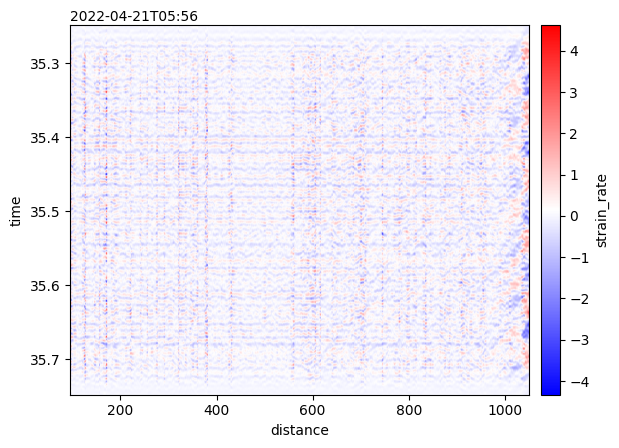

In [ ]:
subspool_taper[1].viz.waterfall()

In [ ]:
subspool_taper_30 = subspool.map(taper,time=0.3,window_type="hamming")

Output()

<Axes: xlabel='distance', ylabel='time'>

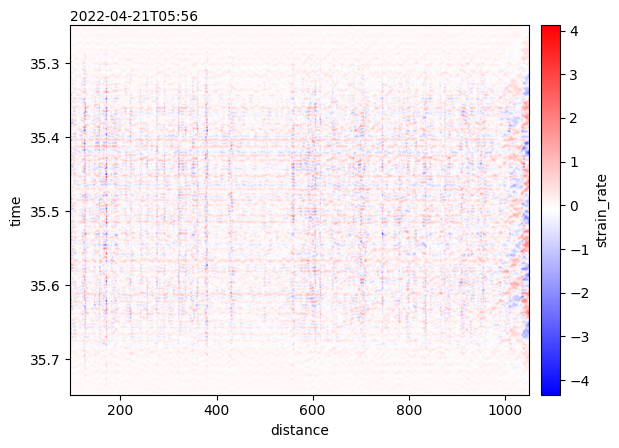

In [ ]:
subspool_taper_30[1].viz.waterfall()

## Practice: Select method  

The cell below will create a new spool. Create a sub-spool of the new spool by selecting all patches with a station code that ends with an 's'.

In [ ]:
in_memory_spool = dc.get_example_spool("diverse_das")

das_folder_path = dc.examples.spool_to_directory(in_memory_spool)
spool = dc.spool(das_folder_path)

In [ ]:
contents = spool.get_contents()

display(contents)

,station,time_step,network,instrument_id,file_format,time_min,data_category,path,experiment_id,file_version,dims,tag,data_type,time_max,_modified
0,wayout,0 days 00:00:00.004000,,,DASDAE,1989-05-04 00:00:00.000,,DAS_____wayout__random__1989_05_04__1989_05_04...,,1,"distance,time",random,,1989-05-04 00:00:07.996,False
1,,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:00.000,,DAS_______random__2020_01_03__2020_01_03T00_00...,,1,"distance,time",random,,2020-01-03 00:00:07.996,False
2,overlaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:00.000,,DAS_____overlaps__random__2020_01_03__2020_01_...,,1,"distance,time",random,,2020-01-03 00:00:07.996,False
3,smallg,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:00.000,,DAS_____smallg__random__2020_01_03__2020_01_03...,,1,"distance,time",random,,2020-01-03 00:00:07.996,False
4,big_gaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:00.000,,DAS_____big_gaps__random__2020_01_03__2020_01_...,,1,"distance,time",random,,2020-01-03 00:00:07.996,False
5,,0 days 00:00:00.004000,das2,,DASDAE,2020-01-03 00:00:00.000,,DAS___das2____random__2020_01_03__2020_01_03T0...,,1,"distance,time",random,,2020-01-03 00:00:07.996,False
6,,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:00.000,,DAS_______some_tag__2020_01_03__2020_01_03T00_...,,1,"distance,time",some_tag,,2020-01-03 00:00:07.996,False
7,overlaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:07.990,,DAS_____overlaps__random__2020_01_03T00_00_07_...,,1,"distance,time",random,,2020-01-03 00:00:15.986,False
8,,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:08.000,,DAS_______random__2020_01_03T00_00_08__2020_01...,,1,"distance,time",random,,2020-01-03 00:00:15.996,False
9,,0 days 00:00:00.004000,das2,,DASDAE,2020-01-03 00:00:08.000,,DAS___das2____random__2020_01_03T00_00_08__202...,,1,"distance,time",random,,2020-01-03 00:00:15.996,False


In [ ]:
#Answer here
subspool_s = spool.select(station="*s")

In [ ]:
contents = subspool_s.get_contents()

display(contents)

,station,time_step,network,instrument_id,file_format,time_min,data_category,path,experiment_id,file_version,dims,tag,data_type,time_max,_modified
2,overlaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:00.000,,DAS_____overlaps__random__2020_01_03__2020_01_...,,1,"distance,time",random,,2020-01-03 00:00:07.996,False
4,big_gaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:00.000,,DAS_____big_gaps__random__2020_01_03__2020_01_...,,1,"distance,time",random,,2020-01-03 00:00:07.996,False
7,overlaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:07.990,,DAS_____overlaps__random__2020_01_03T00_00_07_...,,1,"distance,time",random,,2020-01-03 00:00:15.986,False
11,big_gaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:09.000,,DAS_____big_gaps__random__2020_01_03T00_00_09_...,,1,"distance,time",random,,2020-01-03 00:00:16.996,False
12,overlaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:15.980,,DAS_____overlaps__random__2020_01_03T00_00_15_...,,1,"distance,time",random,,2020-01-03 00:00:23.976,False
16,big_gaps,0 days 00:00:00.004000,,,DASDAE,2020-01-03 00:00:18.000,,DAS_____big_gaps__random__2020_01_03T00_00_18_...,,1,"distance,time",random,,2020-01-03 00:00:25.996,False
